# Clase 3

## Temario

- Prueba de tukey
- Análisis exploratorio de datos (DEA)
- Distribucion de probabilidad
- Distribucion binomial

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #filtra los warnings

In [6]:
df = pd.read_csv("files/stroke.csv")
# Columnas -> features
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
dfInfo = "El dataset tiene {} filas y {} columnas"
print(dfInfo.format(df.shape[0],df.shape[1]))

El dataset tiene 5110 filas y 12 columnas


In [10]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [15]:
numeric_features = df.select_dtypes(exclude='object').columns
categorical_features = df.select_dtypes(include='object').columns

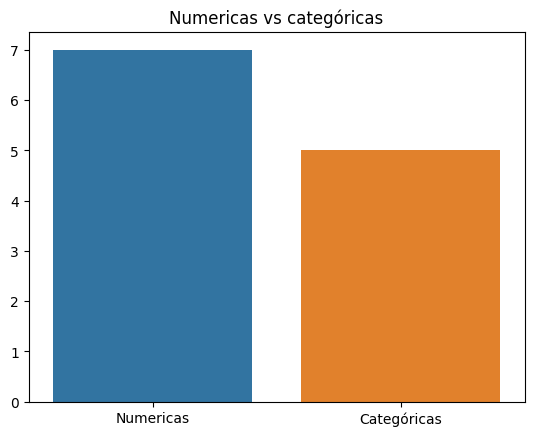

In [21]:
# Visualizar el ratio de variables numericas vs categoricas
ax = sns.barplot(x=['Numericas','Categóricas'],y=[numeric_features.shape[0],categorical_features.shape[0]])
ax.set_title('Numericas vs categóricas')
plt.show()

In [24]:
# Verificamos los valores nulos
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [29]:
# Ideas: Podemos reemplazar el bmi por la media
# print(df['bmi'].max())
bmiMean = df['bmi'].mean() #RIQ, MEDIANA ya que no son sensibles a outliers
# fillna
df['bmi'].fillna(bmiMean, inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [30]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [32]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

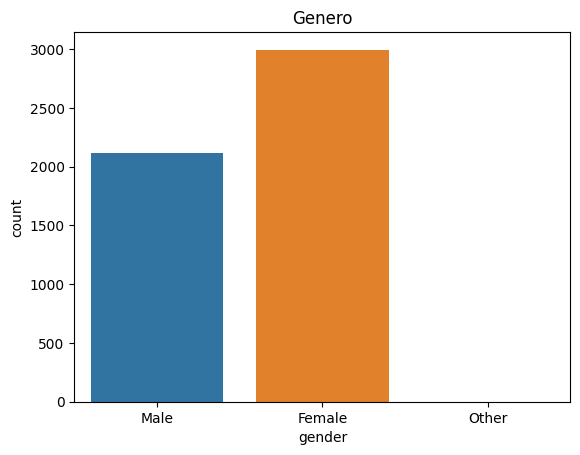

In [34]:
ax = sns.countplot(data=df, x='gender')
ax.set_title('Genero')
plt.show()

In [36]:
df['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

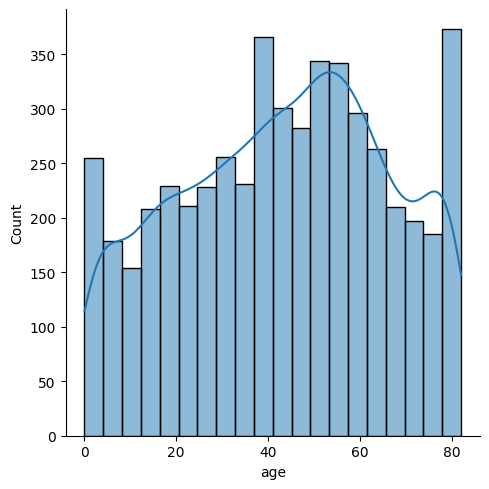

In [40]:
ax = sns.displot(data=df, x="age", kde=True)

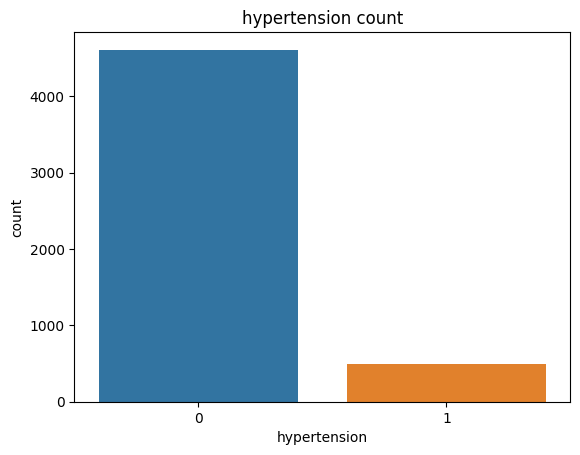

In [45]:
df['hypertension'].unique() #
ax = sns.countplot(data=df,x='hypertension')
ax.set_title('hypertension count')
plt.show()

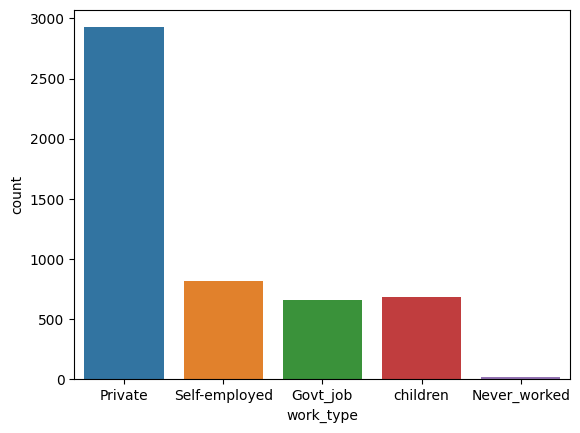

In [48]:
df['work_type'].unique()
ax = sns.countplot(data=df, x='work_type')
plt.show()

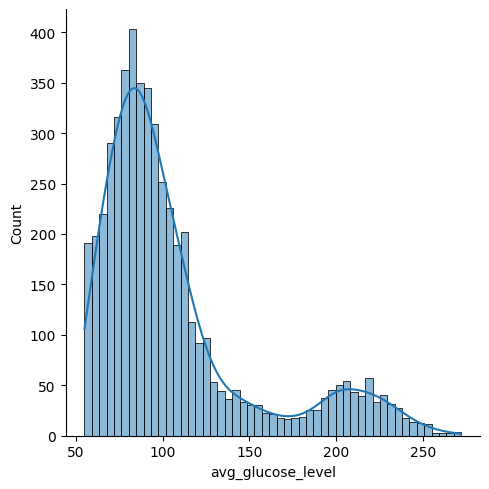

In [50]:
# Distribuciones de niveles de glucosa

ax = sns.displot(data=df, x='avg_glucose_level', kde=True)

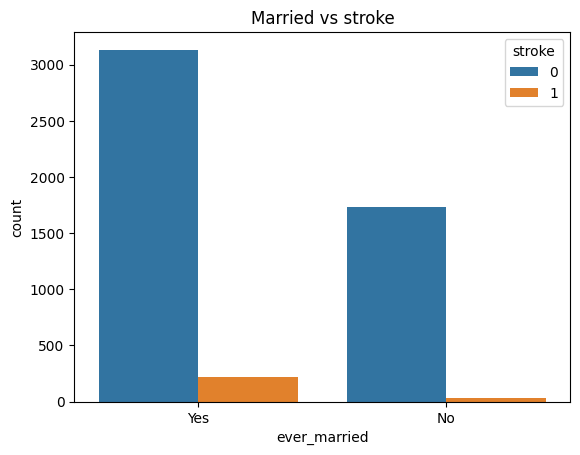

In [55]:
# Relacion entre variables
# Relación entre strokes vs casamientos
ax = sns.countplot(data=df,x='ever_married', hue='stroke')
ax.set_title('Married vs stroke')
# p-value
plt.show()

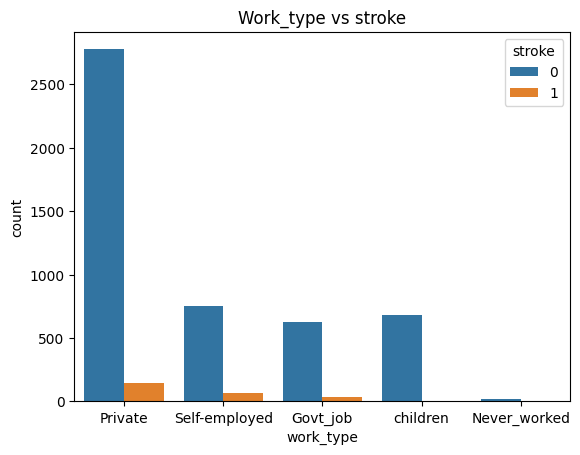

In [57]:
# Tipo de trabajo vs stroke
ax = sns.countplot(data=df,x='work_type', hue='stroke')
ax.set_title('Work_type vs stroke')
# p-value
plt.show()

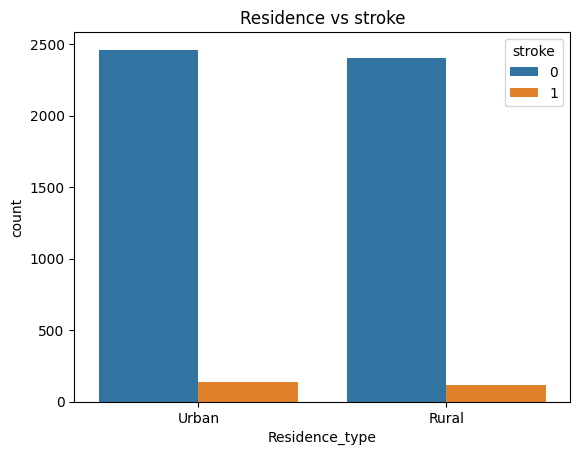

In [59]:
# Tipo de trabajo vs stroke
ax = sns.countplot(data=df,x='Residence_type', hue='stroke')
ax.set_title('Residence vs stroke')
# p-value
plt.show()
# podría eliminar esas features de mi dataset

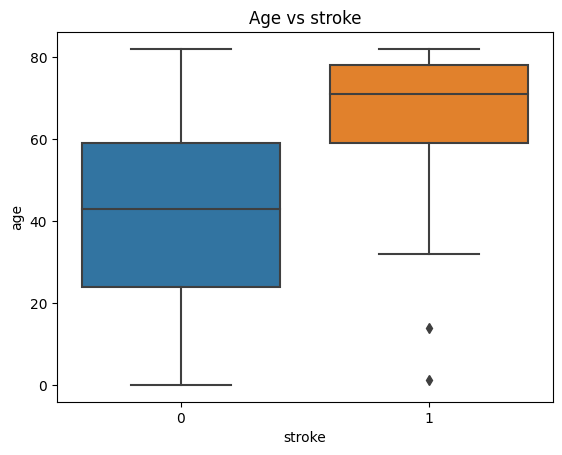

In [64]:
# Numeric features 
ax = sns.boxplot(data=df, x='stroke', y='age')
ax.set_title('Age vs stroke')
plt.show()

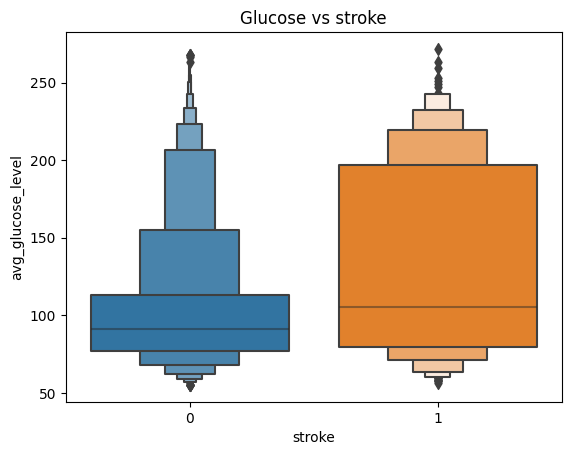

In [67]:
# Numeric features 
ax = sns.boxenplot(data=df, x='stroke', y='avg_glucose_level')
ax.set_title('Glucose vs stroke')
plt.show()

# Funciones de probabilidad / distribucion

Es una función que devuelve la probabilidad [0,1] que una variable aleatoria discreta sea exactamente igual a algun valor
Espacio muestral de tirar una moneda = {Cara,Cruz}
P(cara) = 0.5
P(cruz) = 0.5

![Probabilidad 1](files/discrete-prob.svg)
![Probabilidad 2](files/discrete-prob-2.svg)


## ¿Qué es una distribucion discreta?


X ejemplo: En vez de crear nuestra propia función de distribucion para modelar cara/cruz (decisiones binarias, enfermo/no enfermo) podemos utilizar un modelo matemático discreto que se adapte a esta situación

## Distribución binomial

Discreta. Cuenta el número de exitos en una secuencia de N ensayos (**independientes entre si**) con una probabilidad fija **p** (0.5) (0.3) de ocurrencia éxito. Dicotomico

<AxesSubplot: ylabel='Density'>

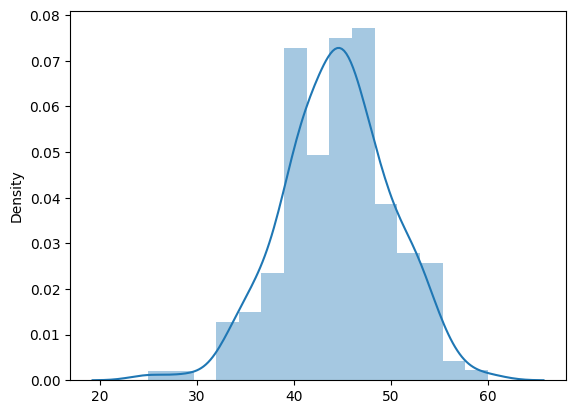

In [75]:
# Teorema del limite central
# p: probabilidad de ocurrencia (éxito)
from numpy import random
rndB = random.binomial(n=150, p=.3, size=200)
# print(rndB)
sns.distplot(rndB,kde=True, hist=True)

La última novela de un autor ha tenido un gran éxito, hasta el punto de que el 80% de los lectores ya la han leído. Un grupo de 4 amigos son aficionados a la lectura:

1 ¿Cuál es la probabilidad de que en el grupo hayan leído la novela 2 personas?

2 Como máximo 2

probabilidad: 0.8 (éxito)
n = 4
q = 1-p

P(x=k) = (n,k)p^k*q^n-k

k = 2
p(x=2) = (4,2)*(0.8)^2*(1-0.8)^(4-2)

In [ ]:
# x = 1
# f(x=1) = x^2

In [77]:
from scipy.stats import binom
resultado1 = binom.pmf(k=2,n=4,p=.8)
print("la probabilidad de que 2 personas hayan leido la novela es :",resultado1)

la probabilidad de que 2 personas hayan leido la novela es : 0.1535999999999999


In [78]:
# Como máximo 2 () (P(X <= 2))
# O: UNION DE CONJUNTOS -> +
# Y: INTERSECCIÓN DE CONJUNTOS -> *
# P(X=0) + P(X=1) + P(X=2)

resultado2 = 0
for i in range(3):
    resultado2 += binom.pmf(k=i, n=4, p=0.8)
print("Como máximo 2 personas: ", resultado2)

Como máximo 2 personas:  0.18079999999999988
